## Maze Generation

In [73]:
import random

def generate_maze(size, density):
    maze = [['.'] * size for _ in range(size)]  
    for i in range(size):
        for j in range(size):
            if random.random() < density:
                maze[i][j] = 'X'  
    maze[0][0] = 'S'  
    maze[size - 1][size - 1] = 'G'  
    return maze

def visualize_maze(maze):
    for row in maze:
        print(' '.join(row))

# Assuming you already have the maze size and obstacle density defined
maze_size = 10
obstacle_density = 0.3

# Generate maze
maze = generate_maze(maze_size, obstacle_density)

# Print the generated maze for inspection
print("Generated Maze:")
visualize_maze(maze)


Generated Maze:
S X X . . X . X . X
X X X X X X . . . .
. . . . . X . . . .
. X . . . . . . . X
. . . . . . X . . .
. . . . X . . . . .
. . X . . . . X X .
X . . . . . . . . .
. . X . . . . X . .
. X X . X . . . . G


## Depth-First Search (DFS)

In [74]:
def dfs(maze, start, goal, visited, path):
    # Define directions: up, down, left, right
    directions = [(0, -1), (0, 1), (-1, 0), (1, 0)]

    # Mark the current cell as visited
    visited.add(start)
    path.append(start)

    # Base case: If the current cell is the goal, return True
    if start == goal:
        return True

    # Recursive DFS exploration
    for dx, dy in directions:
        x, y = start[0] + dx, start[1] + dy
        if 0 <= x < len(maze) and 0 <= y < len(maze[0]) and maze[x][y] != 'X' and (x, y) not in visited:
            if dfs(maze, (x, y), goal, visited, path):
                return True

    # If no path found from this cell, backtrack
    path.pop()
    return False

# Example usage:
start = (0, 0)
goal = (maze_size - 1, maze_size - 1)
visited = set()
path = []
dfs(maze, start, goal, visited, path)

# Visualize the explored path
for i in range(maze_size):
    for j in range(maze_size):
        if (i, j) in path:
            print('P', end=' ')
        else:
            print(maze[i][j], end=' ')
    print()


S X X . . X . X . X 
X X X X X X . . . . 
. . . . . X . . . . 
. X . . . . . . . X 
. . . . . . X . . . 
. . . . X . . . . . 
. . X . . . . X X . 
X . . . . . . . . . 
. . X . . . . X . . 
. X X . X . . . . G 


Run 1:


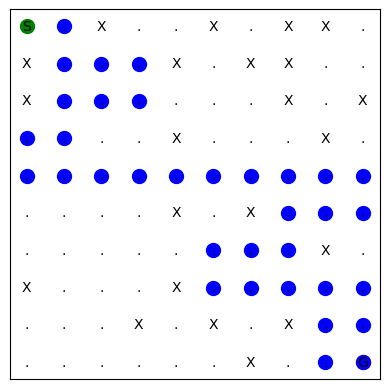

Solution Path Length: 34
Number of Nodes Expanded: 34
Execution Time: 0.0005288999527692795

Run 2:


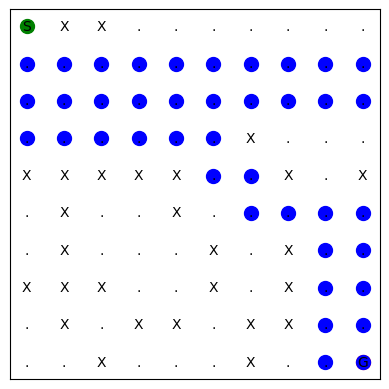

Solution Path Length: 40
Number of Nodes Expanded: 40
Execution Time: 0.0001892000436782837

Run 3:


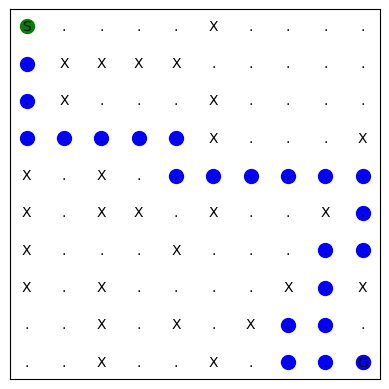

Solution Path Length: 22
Number of Nodes Expanded: 22
Execution Time: 0.00019070040434598923

Run 4:


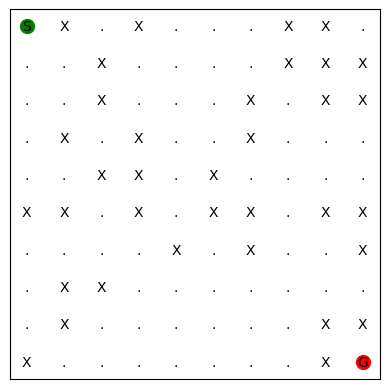

Solution Path Length: Not found
Number of Nodes Expanded: Not found
Execution Time: 6.669946014881134e-05

Run 5:


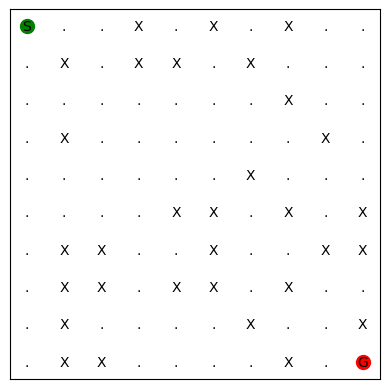

Solution Path Length: Not found
Number of Nodes Expanded: Not found
Execution Time: 0.00032040011137723923

Run 6:


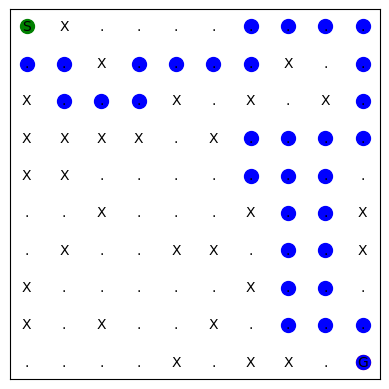

Solution Path Length: 32
Number of Nodes Expanded: 32
Execution Time: 0.0002216007560491562

Run 7:


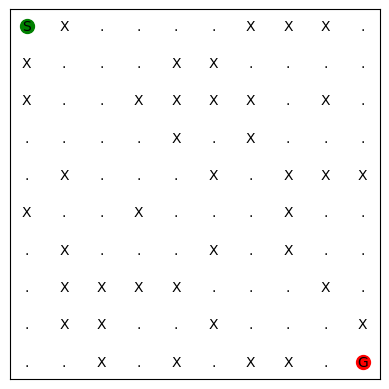

Solution Path Length: Not found
Number of Nodes Expanded: Not found
Execution Time: 1.12997367978096e-05

Run 8:


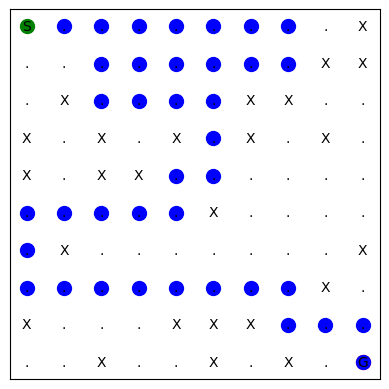

Solution Path Length: 38
Number of Nodes Expanded: 38
Execution Time: 0.00038510002195835114

Run 9:


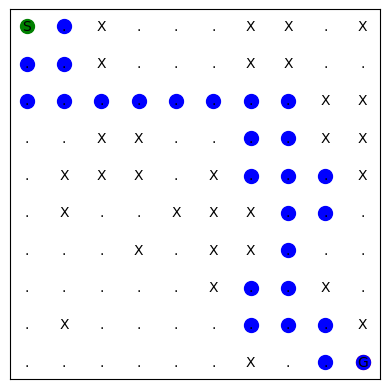

Solution Path Length: 26
Number of Nodes Expanded: 26
Execution Time: 0.0001787003129720688

Run 10:


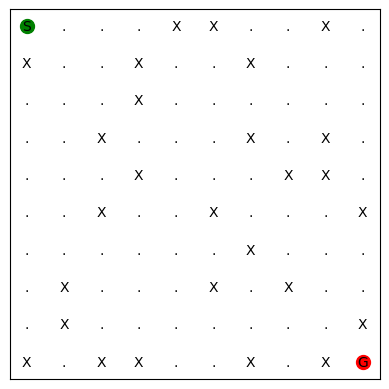

Solution Path Length: Not found
Number of Nodes Expanded: Not found
Execution Time: 0.00023909937590360641

DFS Performance Table (10 Runs):
Run  Solution Path Length Nodes Expanded Execution Time     Status 
1    34                   34             0.0005             Pass   
2    40                   40             0.0002             Pass   
3    22                   22             0.0002             Pass   
4    -                    -              0.0001             Fail   
5    -                    -              0.0003             Fail   
6    32                   32             0.0002             Pass   
7    -                    -              0.0000             Fail   
8    38                   38             0.0004             Pass   
9    26                   26             0.0002             Pass   
10   -                    -              0.0002             Fail   

Average DFS:
32.0                 32.0           0.0003            


In [89]:
from time import perf_counter
import matplotlib.pyplot as plt

# Function to visualize maze with path
def visualize_maze_with_path(maze, path):
    # Convert maze symbols to colors for visualization
    colors = {'S': 'green', 'G': 'red', '.': 'white', 'X': 'white'}
    # Plot maze
    for i in range(len(maze)):
        for j in range(len(maze[0])):
            plt.scatter(j, -i, color=colors[maze[i][j]], s=100)
            plt.text(j, -i, maze[i][j], ha='center', va='center', fontsize=10)
    # Plot path
    if path:
        for cell in path:
            plt.scatter(cell[1], -cell[0], color='blue', s=100)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xticks([])
    plt.yticks([])
    plt.show()

# Initialize lists to store performance metrics for each run
dfs_results = []

def count_expanded_nodes(maze):
    expanded_nodes = sum(row.count('.') for row in maze)
    return expanded_nodes

# Run DFS algorithm 10 times and visualize the maze exploration process for each run
for i in range(1, 11):
    # Generate a new maze for each run (assuming generate_maze is defined elsewhere)
    maze = generate_maze(maze_size, obstacle_density)
    # Start timer
    start_time = perf_counter()
    # Run DFS algorithm on the new maze
    path = []
    dfs(maze, start, goal, set(), path)
    # Stop timer
    end_time = perf_counter()
    execution_time = end_time - start_time
    # Record performance metrics for the current run
    success = len(path) != 0 and path[-1] == goal  # Check if a path was found and if it reaches the goal
    dfs_results.append({
        'Success': success,
        'Solution Path Length': len(path) if success else '-',
        'Nodes Expanded': count_expanded_nodes(maze, path) if success else '-',
        'Execution Time': execution_time
    })
    # Print visualization and performance metrics for the current run
    print(f"Run {i}:")
    visualize_maze_with_path(maze, path)
    print(f"Solution Path Length: {len(path) if success else 'Not found'}")
    print(f"Number of Nodes Expanded: {count_expanded_nodes(maze, path) if success else 'Not found'}")
    print(f"Execution Time: {execution_time}\n")

# Display performance table for DFS
print("DFS Performance Table (10 Runs):")
print("{:<4} {:<20} {:<14} {:<18} {:<7}".format("Run", "Solution Path Length", "Nodes Expanded", "Execution Time", "Status"))
for i, result in enumerate(dfs_results, start=1):
    status = "Pass" if result['Success'] else "Fail"
    print("{:<4} {:<20} {:<14} {:<18.4f} {:<7}".format(i, result.get('Solution Path Length', '-'),
                                                         result.get('Nodes Expanded', '-'),
                                                         result.get('Execution Time', 0), status))

num_successes = len([result for result in dfs_results if result['Success']])
if num_successes > 0:
    avg_solution_length = sum(result['Solution Path Length'] for result in dfs_results if result['Success']) / num_successes
    avg_nodes_expanded = sum(result['Nodes Expanded'] for result in dfs_results if result['Success']) / num_successes
    avg_execution_time = sum(result['Execution Time'] for result in dfs_results if result['Success']) / num_successes
else:
    avg_solution_length = avg_nodes_expanded = avg_execution_time = 0

print("\nAverage DFS:")
print("{:<20} {:<14} {:<18.4f}".format(avg_solution_length, avg_nodes_expanded, avg_execution_time))


## Breadth-First Search (BFS)

Run 1:


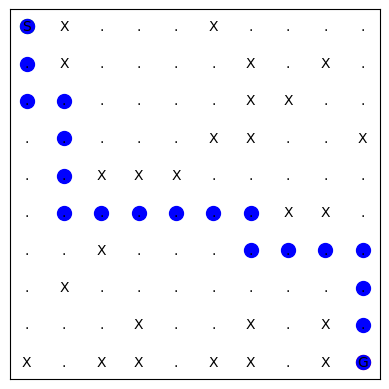

Solution Path Length: 19
Number of Nodes Expanded: 70
Execution Time: 0.0009334003552794456

Run 2:


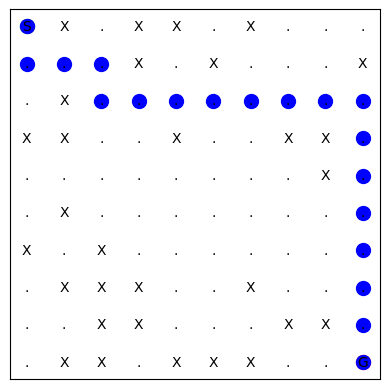

Solution Path Length: 19
Number of Nodes Expanded: 61
Execution Time: 0.0003848997876048088

Run 3:


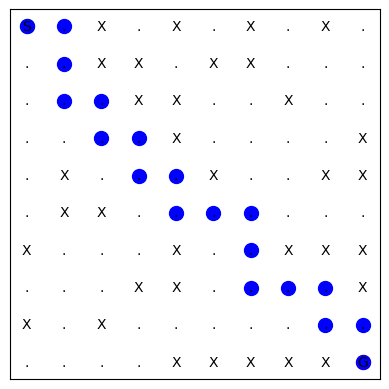

Solution Path Length: 19
Number of Nodes Expanded: 63
Execution Time: 0.000264500267803669

Run 4:


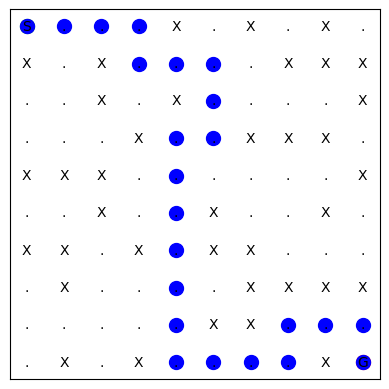

Solution Path Length: 23
Number of Nodes Expanded: 58
Execution Time: 0.0003452003002166748

Run 5:


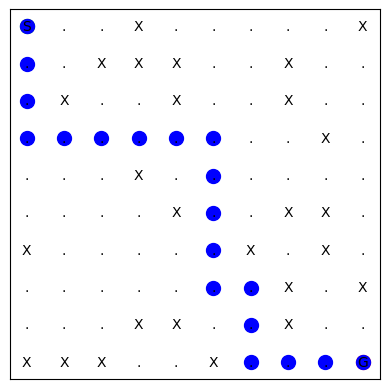

Solution Path Length: 19
Number of Nodes Expanded: 69
Execution Time: 0.00040610041469335556

Run 6:


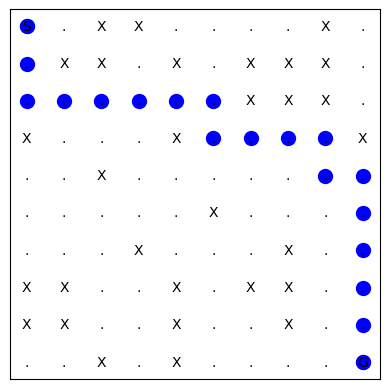

Solution Path Length: 19
Number of Nodes Expanded: 65
Execution Time: 0.0002714991569519043

Run 7:


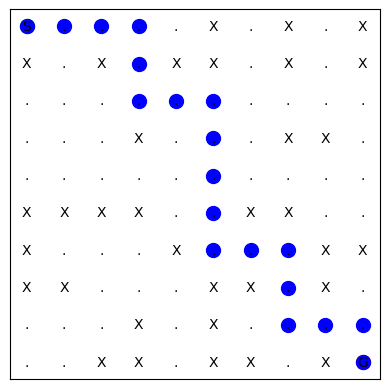

Solution Path Length: 19
Number of Nodes Expanded: 53
Execution Time: 0.0003877999261021614

Run 8:


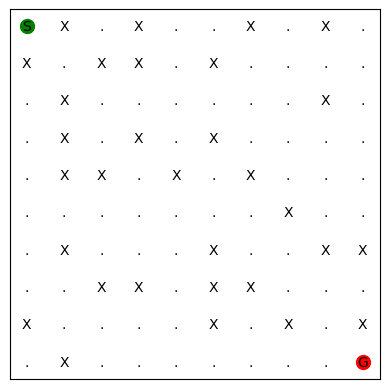

Solution Path Length: Not found
Number of Nodes Expanded: Not found
Execution Time: 2.5899149477481842e-05

Run 9:


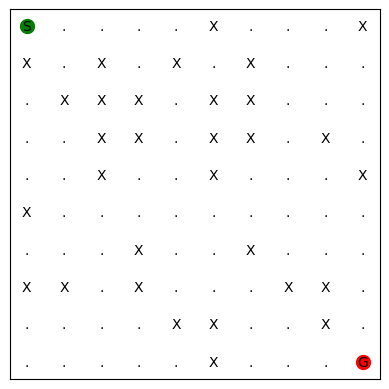

Solution Path Length: Not found
Number of Nodes Expanded: Not found
Execution Time: 6.110034883022308e-05

Run 10:


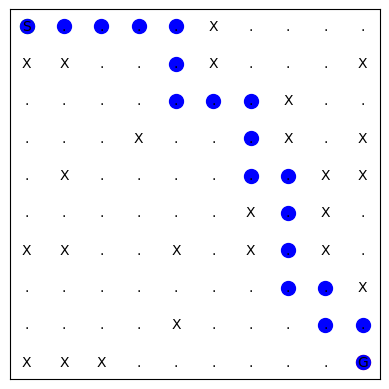

Solution Path Length: 19
Number of Nodes Expanded: 74
Execution Time: 0.00046079978346824646

BFS Performance Table (10 Runs):
Run  Solution Path Length Nodes Expanded Execution Time     Status 
1    19                   70             0.0009             Pass   
2    19                   61             0.0004             Pass   
3    19                   63             0.0003             Pass   
4    23                   58             0.0003             Pass   
5    19                   69             0.0004             Pass   
6    19                   65             0.0003             Pass   
7    19                   53             0.0004             Pass   
8    -                    -              0.0000             Fail   
9    -                    -              0.0001             Fail   
10   19                   74             0.0005             Pass   

Average BFS:
19.5                 64.125         0.0004            


In [92]:
from collections import deque
import matplotlib.pyplot as plt
from time import perf_counter

def bfs(maze, start, goal):
    queue = deque([start])
    visited = set([start])
    path = {}  # To keep track of the path
    directions = [(0, -1), (0, 1), (-1, 0), (1, 0)]

    while queue:
        current = queue.popleft()
        if current == goal:
            break  # Exit when the goal is reached

        for dx, dy in directions:
            next_cell = (current[0] + dx, current[1] + dy)
            if 0 <= next_cell[0] < len(maze) and 0 <= next_cell[1] < len(maze[0]) \
               and maze[next_cell[0]][next_cell[1]] != 'X' and next_cell not in visited:
                queue.append(next_cell)
                visited.add(next_cell)
                path[next_cell] = current  # Trace the path

    # Reconstruct the path from goal to start
    current = goal
    reconstructed_path = []
    while current != start:
        reconstructed_path.append(current)
        current = path.get(current)
        if current is None:  # Path not found
            return [], visited
    reconstructed_path.append(start)
    reconstructed_path.reverse()

    return reconstructed_path, visited

# The visualize_maze_with_path function can remain the same, as it is agnostic to the search algorithm used.
def visualize_maze_with_path(maze, path):
    # Convert maze symbols to colors for visualization
    colors = {'S': 'green', 'G': 'red', '.': 'white', 'X': 'white'}
    # Plot maze
    for i in range(len(maze)):
        for j in range(len(maze[0])):
            plt.scatter(j, -i, color=colors[maze[i][j]], s=100)
            plt.text(j, -i, maze[i][j], ha='center', va='center', fontsize=10)
    # Plot path
    if path:
        for cell in path:
            plt.scatter(cell[1], -cell[0], color='blue', s=100)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xticks([])
    plt.yticks([])
    plt.show()

# The count_expanded_nodes function also remains largely unchanged, except for its use in the context of BFS.
def count_expanded_nodes(maze, path):
    # Count the number of nodes expanded during the DFS exploration
    expanded_nodes = set()
    for cell in path:
        expanded_nodes.add(cell)
    return len(expanded_nodes)

# Initialize lists to store performance metrics for each run
bfs_results = []

# Assuming generate_maze, maze_size, and obstacle_density are defined elsewhere
for i in range(1, 11):
    maze = generate_maze(maze_size, obstacle_density)
    start_time = perf_counter()
    path, visited = bfs(maze, start, goal)
    end_time = perf_counter()
    execution_time = end_time - start_time

    success = len(path) > 0 and path[-1] == goal
    bfs_results.append({
        'Success': success,
        'Solution Path Length': len(path) if success else '-',
        'Nodes Expanded': len(visited) if success else '-',
        'Execution Time': execution_time
    })

    print(f"Run {i}:")
    visualize_maze_with_path(maze, path)
    print(f"Solution Path Length: {len(path) if success else 'Not found'}")
    print(f"Number of Nodes Expanded: {len(visited) if success else 'Not found'}")
    print(f"Execution Time: {execution_time}\n")

# Summary and performance table for BFS will be similar to the previous DFS implementation, but using bfs_results.
print("BFS Performance Table (10 Runs):")
print("{:<4} {:<20} {:<14} {:<18} {:<7}".format("Run", "Solution Path Length", "Nodes Expanded", "Execution Time", "Status"))
for i, result in enumerate(bfs_results, start=1):
    status = "Pass" if result['Success'] else "Fail"
    print("{:<4} {:<20} {:<14} {:<18.4f} {:<7}".format(i, result.get('Solution Path Length', '-'),
                                                         result.get('Nodes Expanded', '-'),
                                                         result.get('Execution Time', 0), status))

num_successes = len([result for result in bfs_results if result['Success']])
if num_successes > 0:
    avg_solution_length = sum(result['Solution Path Length'] for result in bfs_results if result['Success']) / num_successes
    avg_nodes_expanded = sum(result['Nodes Expanded'] for result in bfs_results if result['Success']) / num_successes
    avg_execution_time = sum(result['Execution Time'] for result in bfs_results if result['Success']) / num_successes
else:
    avg_solution_length = avg_nodes_expanded = avg_execution_time = 0

print("\nAverage BFS:")
print("{:<20} {:<14} {:<18.4f}".format(avg_solution_length, avg_nodes_expanded, avg_execution_time))


## A* Algorithm

Run 1:


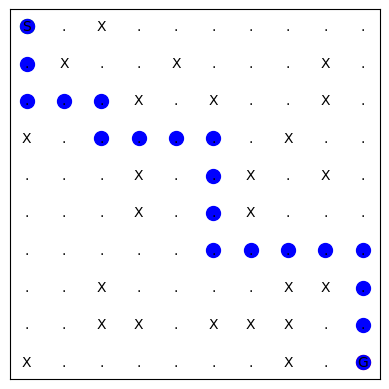

Solution Path Length: 19
Number of Nodes Expanded: 19
Execution Time: 0.0004960997030138969

Run 2:


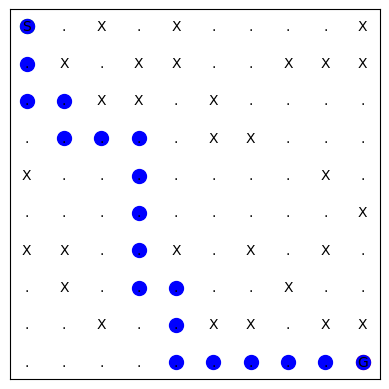

Solution Path Length: 19
Number of Nodes Expanded: 19
Execution Time: 0.0003387005999684334

Run 3:


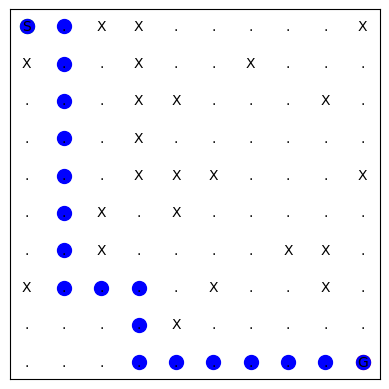

Solution Path Length: 19
Number of Nodes Expanded: 19
Execution Time: 0.0001987004652619362

Run 4:


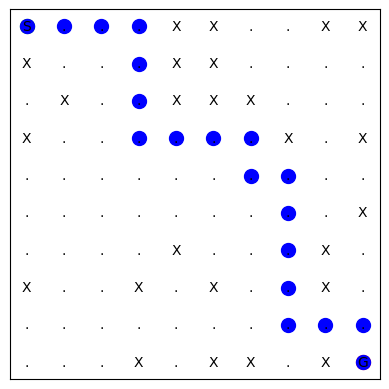

Solution Path Length: 19
Number of Nodes Expanded: 19
Execution Time: 0.000396200455725193

Run 5:


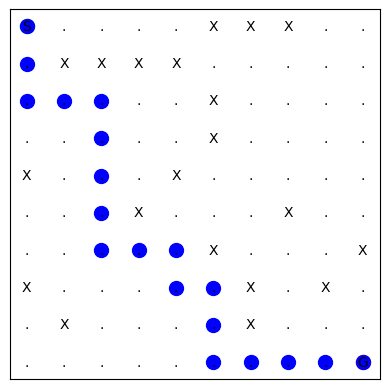

Solution Path Length: 19
Number of Nodes Expanded: 19
Execution Time: 0.0003533000126481056

Run 6:


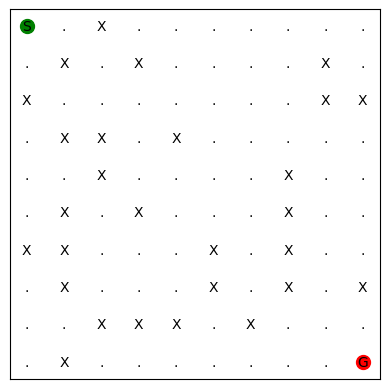

Solution Path Length: Not found
Number of Nodes Expanded: Not found
Execution Time: 2.5500543415546417e-05

Run 7:


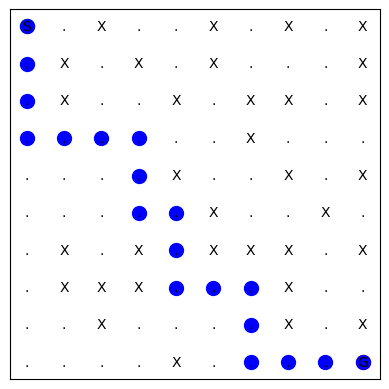

Solution Path Length: 19
Number of Nodes Expanded: 19
Execution Time: 0.00030079949647188187

Run 8:


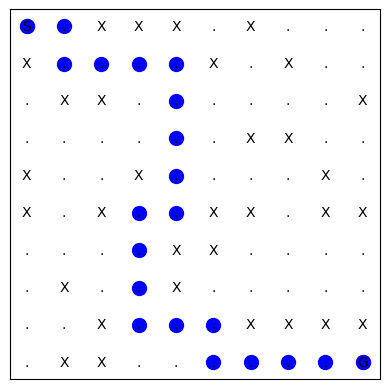

Solution Path Length: 21
Number of Nodes Expanded: 21
Execution Time: 0.0009131003171205521

Run 9:


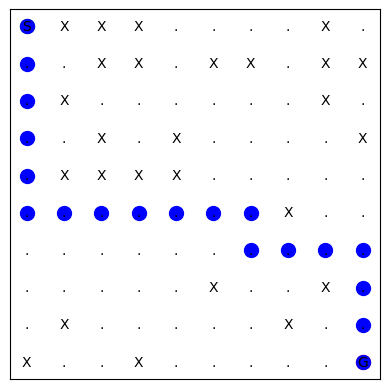

Solution Path Length: 19
Number of Nodes Expanded: 19
Execution Time: 0.0003396999090909958

Run 10:


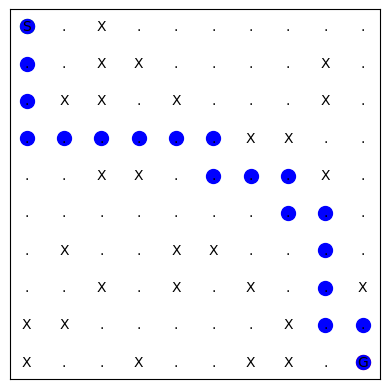

Solution Path Length: 19
Number of Nodes Expanded: 19
Execution Time: 0.00038140080869197845

A* Performance Table (10 Runs):
Run  Solution Path Length Nodes Expanded Execution Time     Status 
1    19                   19             0.0005             Pass   
2    19                   19             0.0003             Pass   
3    19                   19             0.0002             Pass   
4    19                   19             0.0004             Pass   
5    19                   19             0.0004             Pass   
6    -                    -              0.0000             Fail   
7    19                   19             0.0003             Pass   
8    21                   21             0.0009             Pass   
9    19                   19             0.0003             Pass   
10   19                   19             0.0004             Pass   

Average A*:
19.22222222222222    19.22222222222222 0.0004            


In [97]:
import heapq
from time import perf_counter
def heuristic(node, goal):
    # Manhattan distance heuristic
    return abs(node[0] - goal[0]) + abs(node[1] - goal[1])

def astar(maze, start, goal):
    queue = [(heuristic(start, goal), 0, start, [])]
    visited = set()

    while queue:
        _, cost, current, path = heapq.heappop(queue)

        if current == goal:
            return path + [current]

        if current not in visited:
            visited.add(current)
            for neighbor in [(current[0] + 1, current[1]), (current[0] - 1, current[1]),
                              (current[0], current[1] + 1), (current[0], current[1] - 1)]:
                if 0 <= neighbor[0] < len(maze) and 0 <= neighbor[1] < len(maze[0]) and maze[neighbor[0]][neighbor[1]] != 'X':
                    new_cost = cost + 1
                    heapq.heappush(queue, (new_cost + heuristic(neighbor, goal), new_cost, neighbor, path + [current]))

    return []  # If no path is found

# Run A* algorithm 10 times and visualize the maze exploration process for each run
astar_results = []
for i in range(1, 11):
    # Generate a new maze for each run
    maze = generate_maze(maze_size, obstacle_density)
    # Start timer
    start_time = perf_counter()
    # Run A* algorithm on the new maze
    path = astar(maze, start, goal)
    # Stop timer
    end_time = perf_counter()
    execution_time = end_time - start_time
    # Record performance metrics for the current run
    success = len(path) != 0 and path[-1] == goal
    astar_results.append({
        'Success': success,
        'Solution Path Length': len(path) if success else '-',
        'Nodes Expanded': count_expanded_nodes(maze, path) if success else '-',
        'Execution Time': execution_time
    })
    # Print visualization and performance metrics for the current run
    print(f"Run {i}:")
    visualize_maze_with_path(maze, path)
    print(f"Solution Path Length: {len(path) if success else 'Not found'}")
    print(f"Number of Nodes Expanded: {count_expanded_nodes(maze, path) if success else 'Not found'}")
    print(f"Execution Time: {execution_time}\n")

# Display performance table for A*
print("A* Performance Table (10 Runs):")
print("{:<4} {:<20} {:<14} {:<18} {:<7}".format("Run", "Solution Path Length", "Nodes Expanded", "Execution Time", "Status"))
for i, result in enumerate(astar_results, start=1):
    status = "Pass" if result['Success'] else "Fail"
    print("{:<4} {:<20} {:<14} {:<18.4f} {:<7}".format(i, result.get('Solution Path Length', '-'),
                                                         result.get('Nodes Expanded', '-'),
                                                         result.get('Execution Time', 0), status))

num_successes = len([result for result in astar_results if result['Success']])
if num_successes > 0:
    avg_solution_length = sum(result['Solution Path Length'] for result in astar_results if result['Success']) / num_successes
    avg_nodes_expanded = sum(result['Nodes Expanded'] for result in astar_results if result['Success']) / num_successes
    avg_execution_time = sum(result['Execution Time'] for result in astar_results if result['Success']) / num_successes
else:
    avg_solution_length = avg_nodes_expanded = avg_execution_time = 0

print("\nAverage A*:")
print("{:<20} {:<14} {:<18.4f}".format(avg_solution_length, avg_nodes_expanded, avg_execution_time))